In [1]:
library(GSEABase)

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Welcome to Bioconductor

    Vignettes contain introductory material; view with


In [2]:
library(GSVA)
library(limma)

Warning message:
“multiple methods tables found for ‘which’”

Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




In [3]:
load(file="0725-normalizedcounts_withref.Rda")

In [4]:
##读取Geneset
geneSets <- getGmt("c2.cp.reactome.v7.4.symbols.gmt")

In [5]:
##运行GSVA，返回二项式分布的结果
res_es <- gsva(normalized_counts, geneSets, min.sz=10, max.sz=500, verbose=FALSE, kcdf="Gaussian",method = "gsva",parallel.sz=1)

In [6]:
#plot the mean enrichment score

In [7]:
write.table(res_es,file="0803-mean-reactome.txt")

In [8]:
#compare the groups

In [9]:
normalizedcounts2<-normalized_counts[,c(1,3,5,7,13,14,15,16,17,24,25,26,27,28,29,31,33,35,37,39,41,43)]

In [10]:
colnames(normalizedcounts2)

[1] "Ca1"              "Ca2534465"        "Ca2537821"        "Ca3"             
 [5] "Ca4"              "Ca5"              "Ca6"              "Ca7"             
 [9] "Ca2"              "Ca2393116"        "Ca2518780"        "Ca2520263"       
[13] "Ca2523247"        "Ca2287602"        "TCGA.W5.AA2I.01A" "TCGA.W5.AA2Q.01A"
[17] "TCGA.W5.AA2R.01A" "TCGA.W5.AA2U.01A" "TCGA.W5.AA30.01A" "TCGA.W5.AA31.01A"
[21] "TCGA.W5.AA34.01A" "TCGA.ZU.A8S4.01A"

In [11]:
##设置分组
type1<-c(0,1,rep(0,times=12),1,1,1,1,1,0,1,0)

In [12]:
##设置分组
type1b<-c(1,0,rep(1,times=12),0,0,0,0,0,1,0,1)

In [13]:
##设置分组
type2<-c(1,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0)

In [14]:
##设置分组
type2b<-c(0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1)

In [15]:
##设置分组
type3<-c(0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1)

In [16]:
##设置分组
type3b<-c(1,1,1,0,0,1,0,1,1,0,1,0,0,1,1,1,1,1,1,0,1,0)

In [17]:
res_es2<-res_es[,c(1,3,5,7,13,14,15,16,17,24,25,26,27,28,29,31,33,35,37,39,41,43)]

In [18]:
desigN<-data.frame(type1,type1b)
rownames(desigN)<-colnames(normalizedcounts2)
desigN

,type1,type1b
,<dbl>,<dbl>
Ca1,0,1
Ca2534465,1,0
Ca2537821,0,1
Ca3,0,1
Ca4,0,1
Ca5,0,1
Ca6,0,1
Ca7,0,1
Ca2,0,1


In [19]:
#这里需要手动构建差异矩阵，我这里用每个亚类的case和control比较，寻找其中的差异
comparE <- makeContrasts(compare1=type1-type1b,levels=c('type1','type1b'))

In [20]:
comparE

,compare1
type1,1
type1b,-1


In [21]:
fiT <- lmFit(res_es2, desigN)
fiT2 <- contrasts.fit(fiT, comparE)

In [22]:
fiT3 <- eBayes(fiT2)
#这里获取一步ANNOVA检验获取的不同分组的log2FC,可以用来构造热图
Diff1<-topTable(fiT3,p.value=0.01,num=150)

In [23]:
desigN<-data.frame(type2,type2b)
rownames(desigN)<-colnames(normalizedcounts2)
desigN

,type2,type2b
,<dbl>,<dbl>
Ca1,1,0
Ca2534465,0,1
Ca2537821,1,0
Ca3,0,1
Ca4,0,1
Ca5,1,0
Ca6,0,1
Ca7,1,0
Ca2,1,0


In [24]:
#这里需要手动构建差异矩阵，我这里用每个亚类的case和control比较，寻找其中的差异
comparE <- makeContrasts(compare1=type2-type2b,levels=c('type2','type2b'))

In [25]:
comparE

,compare1
type2,1
type2b,-1


In [26]:
fiT <- lmFit(res_es2, desigN)
fiT2 <- contrasts.fit(fiT, comparE)

In [27]:
fiT3 <- eBayes(fiT2)
#这里获取一步ANNOVA检验获取的不同分组的log2FC,可以用来构造热图
Diff2<-topTable(fiT3,p.value=0.01,num=150)

In [28]:
desigN<-data.frame(type3,type3b)
rownames(desigN)<-colnames(normalizedcounts2)
desigN

,type3,type3b
,<dbl>,<dbl>
Ca1,0,1
Ca2534465,0,1
Ca2537821,0,1
Ca3,1,0
Ca4,1,0
Ca5,0,1
Ca6,1,0
Ca7,0,1
Ca2,0,1


In [29]:
#这里需要手动构建差异矩阵，我这里用每个亚类的case和control比较，寻找其中的差异
comparE <- makeContrasts(compare1=type3-type3b,levels=c('type3','type3b'))

In [30]:
comparE

,compare1
type3,1
type3b,-1


In [31]:
fiT <- lmFit(res_es2, desigN)
fiT2m <- contrasts.fit(fiT, comparE)

In [32]:
fiT3m <- eBayes(fiT2m)
#这里获取一步ANNOVA检验获取的不同分组的log2FC,可以用来构造热图
Diff3<-topTable(fiT3m,p.value=0.05,num=150)

In [33]:
summary(Diff1)
summary(Diff2)
summary(Diff3)

     logFC             AveExpr               t              P.Value         
 Min.   :-0.57930   Min.   :-0.37402   Min.   :-6.0090   Min.   :1.877e-06  
 1st Qu.:-0.45908   1st Qu.:-0.22969   1st Qu.:-4.7491   1st Qu.:5.772e-06  
 Median :-0.37798   Median :-0.03934   Median :-4.5062   Median :5.121e-05  
 Mean   :-0.05915   Mean   :-0.07472   Mean   :-0.7974   Mean   :4.841e-05  
 3rd Qu.: 0.51254   3rd Qu.: 0.06000   3rd Qu.: 4.9645   3rd Qu.:6.637e-05  
 Max.   : 0.66874   Max.   : 0.16401   Max.   : 5.6787   Max.   :1.301e-04  
   adj.P.Val              B        
 Min.   :0.001222   Min.   :1.068  
 1st Qu.:0.001222   1st Qu.:1.717  
 Median :0.004831   Median :1.948  
 Mean   :0.004134   Mean   :2.573  
 3rd Qu.:0.005202   3rd Qu.:4.011  
 Max.   :0.007953   Max.   :5.069  

     logFC            AveExpr                t             P.Value         
 Min.   :-0.5852   Min.   :-0.461411   Min.   :-5.193   Min.   :5.709e-07  
 1st Qu.: 0.3321   1st Qu.:-0.052829   1st Qu.: 3.845   1st Qu.:3.077e-05  
 Median : 0.4092   Median : 0.010383   Median : 4.244   Median :2.059e-04  
 Mean   : 0.3261   Mean   : 0.001679   Mean   : 3.479   Mean   :2.965e-04  
 3rd Qu.: 0.4726   3rd Qu.: 0.061745   3rd Qu.: 4.940   3rd Qu.:4.767e-04  
 Max.   : 0.7535   Max.   : 0.320354   Max.   : 6.458   Max.   :9.377e-04  
   adj.P.Val               B          
 Min.   :0.0004511   Min.   :-0.8149  
 1st Qu.:0.0012751   1st Qu.:-0.1798  
 Median :0.0043418   Median : 0.6121  
 Mean   :0.0045398   Mean   : 1.1144  
 3rd Qu.:0.0067256   3rd Qu.: 2.4150  
 Max.   :0.0099719   Max.   : 6.2001  

< table of extent 0 x 0 >

In [34]:
Diff1b<-Diff1[which(Diff1$logFC>0),]

In [35]:
Diff2b<-Diff2[which(Diff2$logFC>0),]

In [36]:
Diff1b
Diff2b

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
REACTOME_GLUTATHIONE_CONJUGATION,0.5101212,-0.2308707,5.678745,4.552385e-06,0.001222335,4.233182
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT_ATP_SYNTHESIS_BY_CHEMIOSMOTIC_COUPLING_AND_HEAT_PRODUCTION_BY_UNCOUPLING_PROTEINS,0.6380842,-0.2264801,5.660991,4.775447e-06,0.001222335,4.188021
REACTOME_COMPLEX_I_BIOGENESIS,0.6687442,-0.2292897,5.636891,5.095984e-06,0.001222335,4.126685
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT,0.6523451,-0.2338866,5.576567,5.996739e-06,0.001222335,3.972997
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT,0.5197806,-0.2321341,5.409952,9.409647e-06,0.001644000,3.547494
REACTOME_GLUTATHIONE_SYNTHESIS_AND_RECYCLING,0.5351719,-0.2110308,4.816043,4.720520e-05,0.004830604,2.024225
REACTOME_GLYCOGEN_STORAGE_DISEASES,0.4033705,-0.2422952,4.779770,5.209591e-05,0.004830604,1.931176
REACTOME_MITOCHONDRIAL_FATTY_ACID_BETA_OXIDATION,0.3634190,-0.3740178,4.769988,5.349935e-05,0.004830604,1.906088


,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
REACTOME_REGULATION_OF_KIT_SIGNALING,0.6096611,0.034185819,6.458268,5.709317e-07,0.0004510945,6.200076
REACTOME_CLEC7A_DECTIN_1_INDUCES_NFAT_ACTIVATION,0.6696048,-0.117179386,6.361010,7.376852e-07,0.0004510945,5.957295
REACTOME_INTERLEUKIN_3_INTERLEUKIN_5_AND_GM_CSF_SIGNALING,0.5047193,0.003064765,6.133246,1.348943e-06,0.0005499193,5.384954
REACTOME_REGULATION_OF_SIGNALING_BY_CBL,0.4626719,-0.071688914,5.897899,2.528502e-06,0.0006343129,4.788534
REACTOME_SCAVENGING_BY_CLASS_A_RECEPTORS,0.4739527,-0.086289970,5.888459,2.593266e-06,0.0006343129,4.764515
REACTOME_CD28_DEPENDENT_VAV1_PATHWAY,0.6762113,0.023920972,5.748328,3.777639e-06,0.0007627486,4.407189
REACTOME_SODIUM_CALCIUM_EXCHANGERS,0.6762295,-0.012851703,5.694564,4.365691e-06,0.0007627486,4.269729
REACTOME_FCGR_ACTIVATION,0.7535134,0.009970266,5.603294,5.583308e-06,0.0008143996,4.035965
REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGNALING,0.4564947,0.029092489,5.538993,6.641788e-06,0.0008143996,3.870984


In [37]:
Diffall<-c(rownames(Diff1b),rownames(Diff2b))
Diffall<-unique(Diffall)

In [38]:
options(repr.plot.height=15,repr.plot.width=15)
library(pheatmap)
draw<-res_es2[Diffall,]

In [39]:
library(viridis)

Loading required package: viridisLite



In [40]:
options(repr.plot.height=20,repr.plot.width=15)

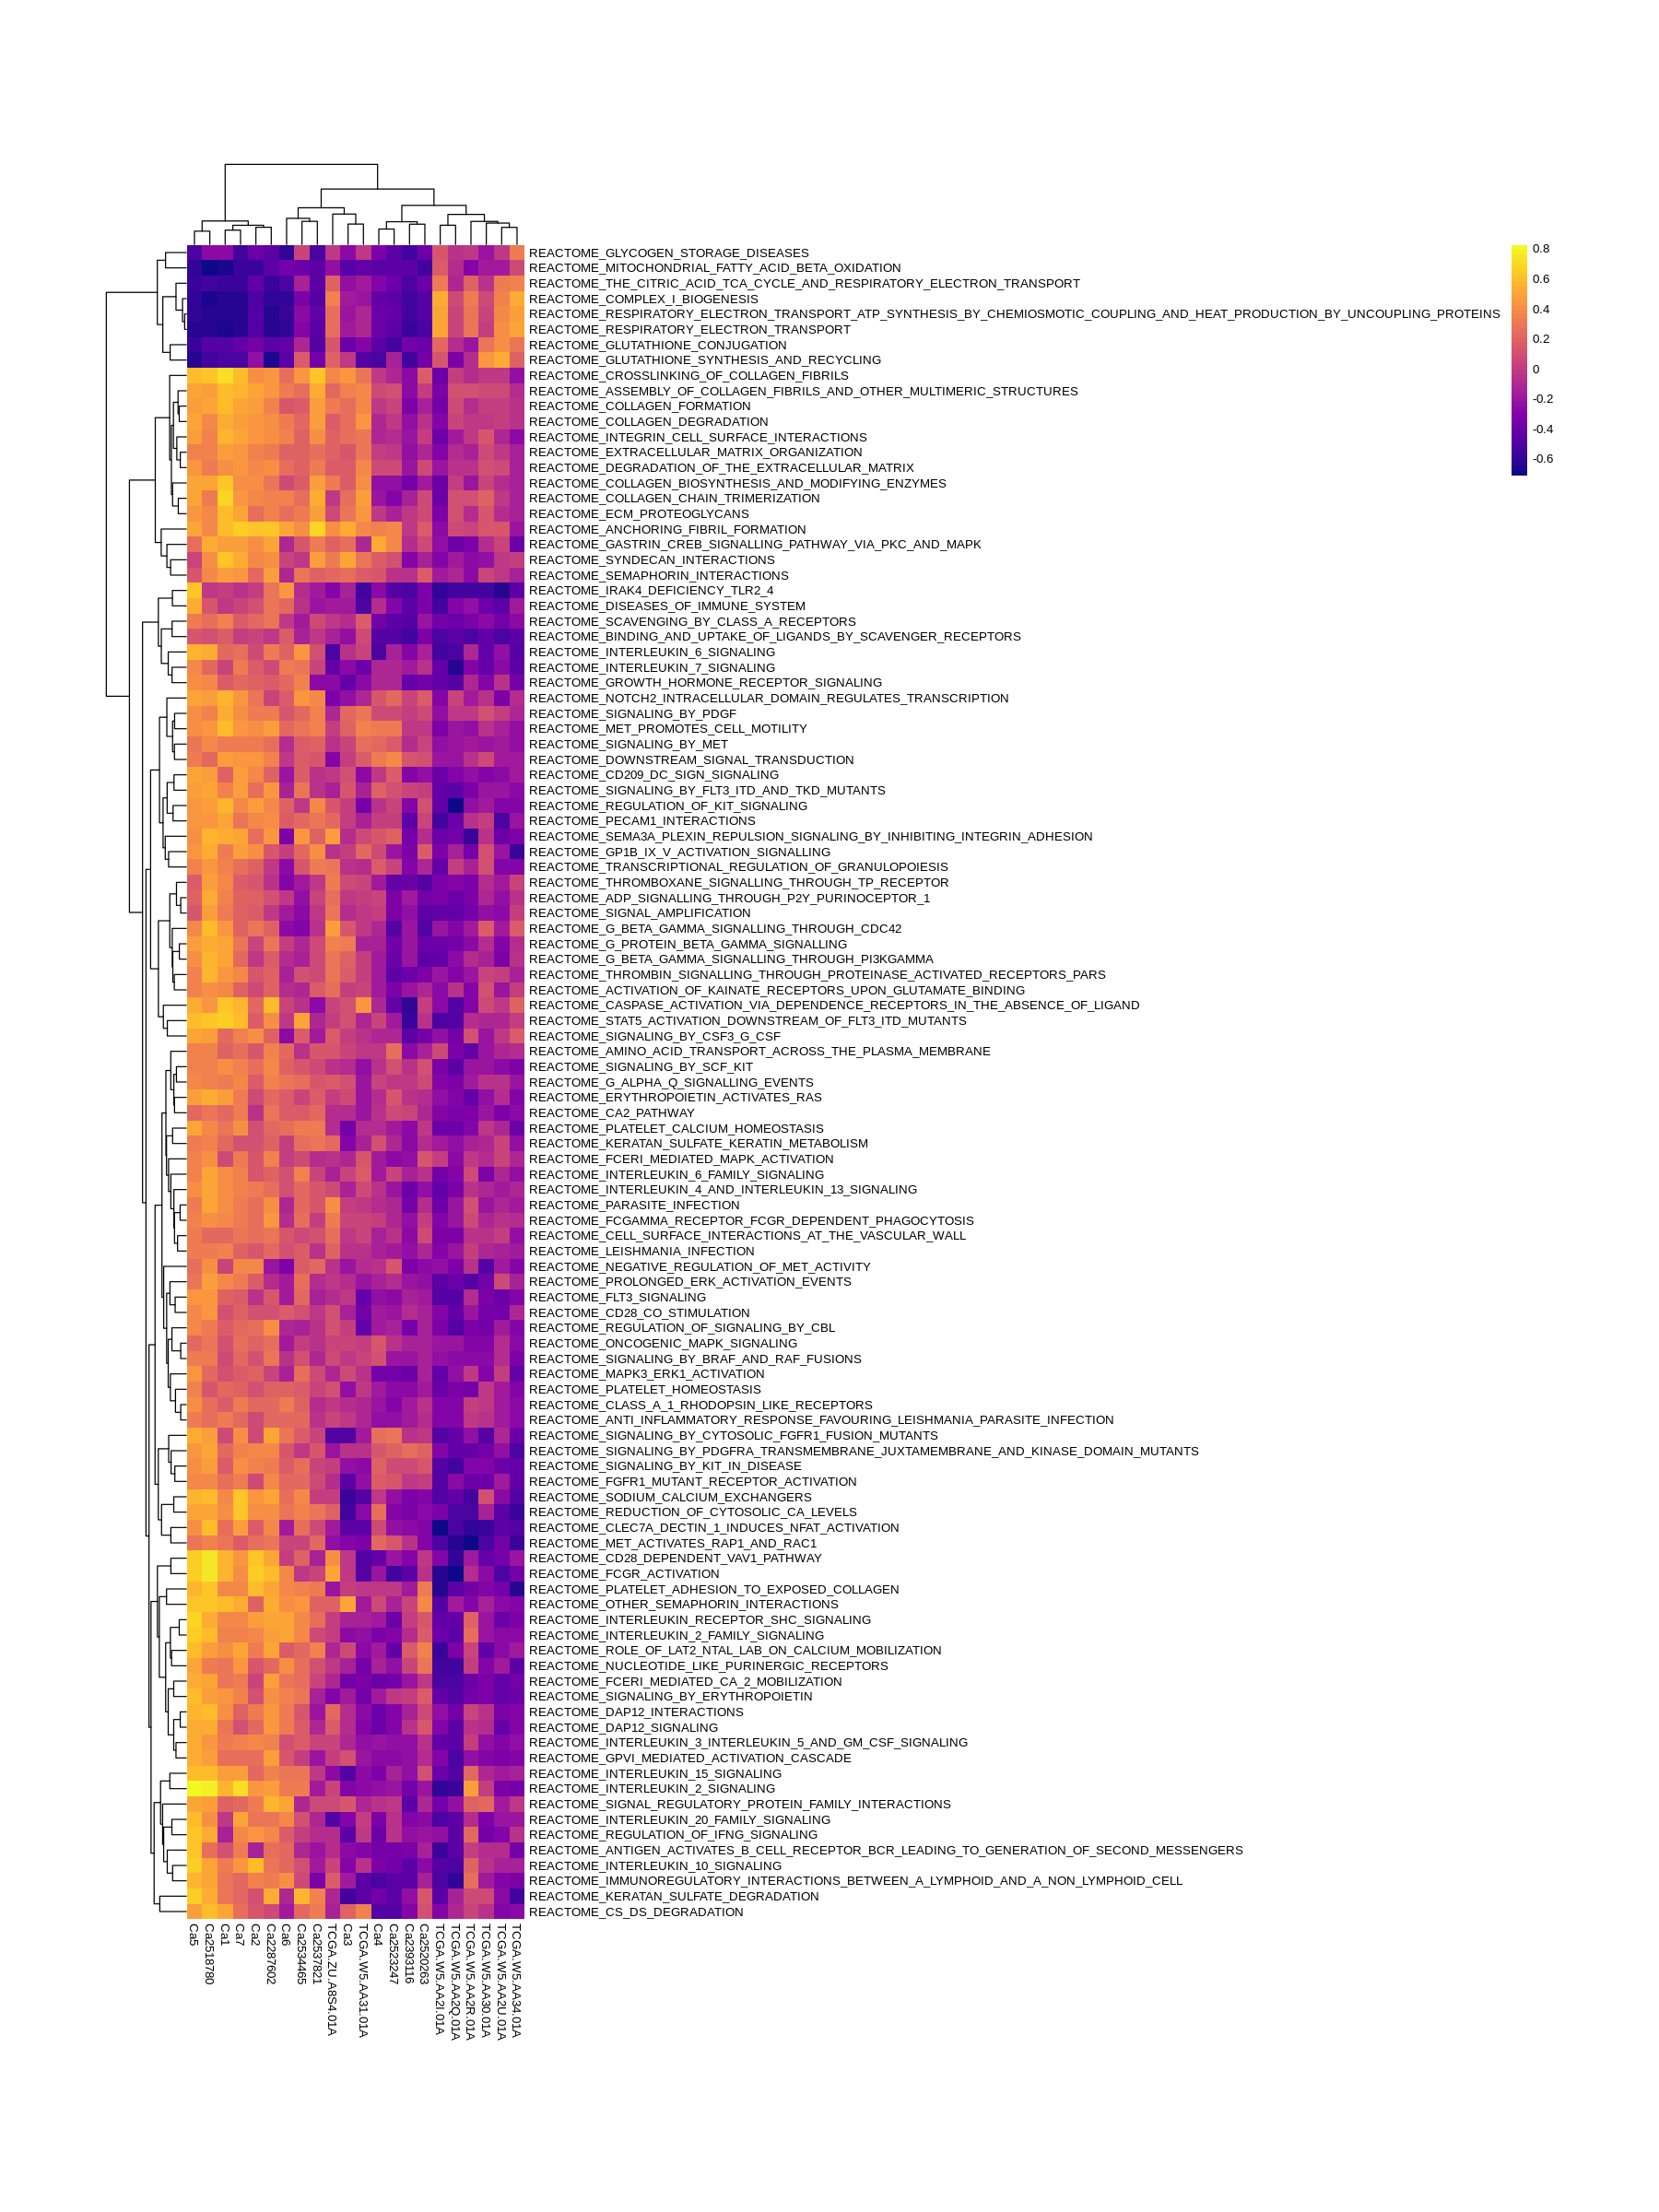

In [41]:
pheatmap(draw,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8)

In [42]:
pheatmap(draw,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8,file='0808-subtypeGSVA.pdf')

In [43]:
write.csv(rownames(draw),file='0808-filterGSVA.csv')

In [44]:
names<-read.csv(file='0808-filterGSVA-34-2.csv')

In [45]:
names

colnames
<chr>
REACTOME_GLUTATHIONE_CONJUGATION
REACTOME_RESPIRATORY_ELECTRON_TRANSPORT
REACTOME_THE_CITRIC_ACID_TCA_CYCLE_AND_RESPIRATORY_ELECTRON_TRANSPORT
REACTOME_GLUTATHIONE_SYNTHESIS_AND_RECYCLING
REACTOME_GLYCOGEN_STORAGE_DISEASES
REACTOME_MITOCHONDRIAL_FATTY_ACID_BETA_OXIDATION
REACTOME_INTERLEUKIN_3_INTERLEUKIN_5_AND_GM_CSF_SIGNALING
REACTOME_FCGR_ACTIVATION
REACTOME_INTERLEUKIN_4_AND_INTERLEUKIN_13_SIGNALING


In [46]:
draw3<-draw[names$colnames,]

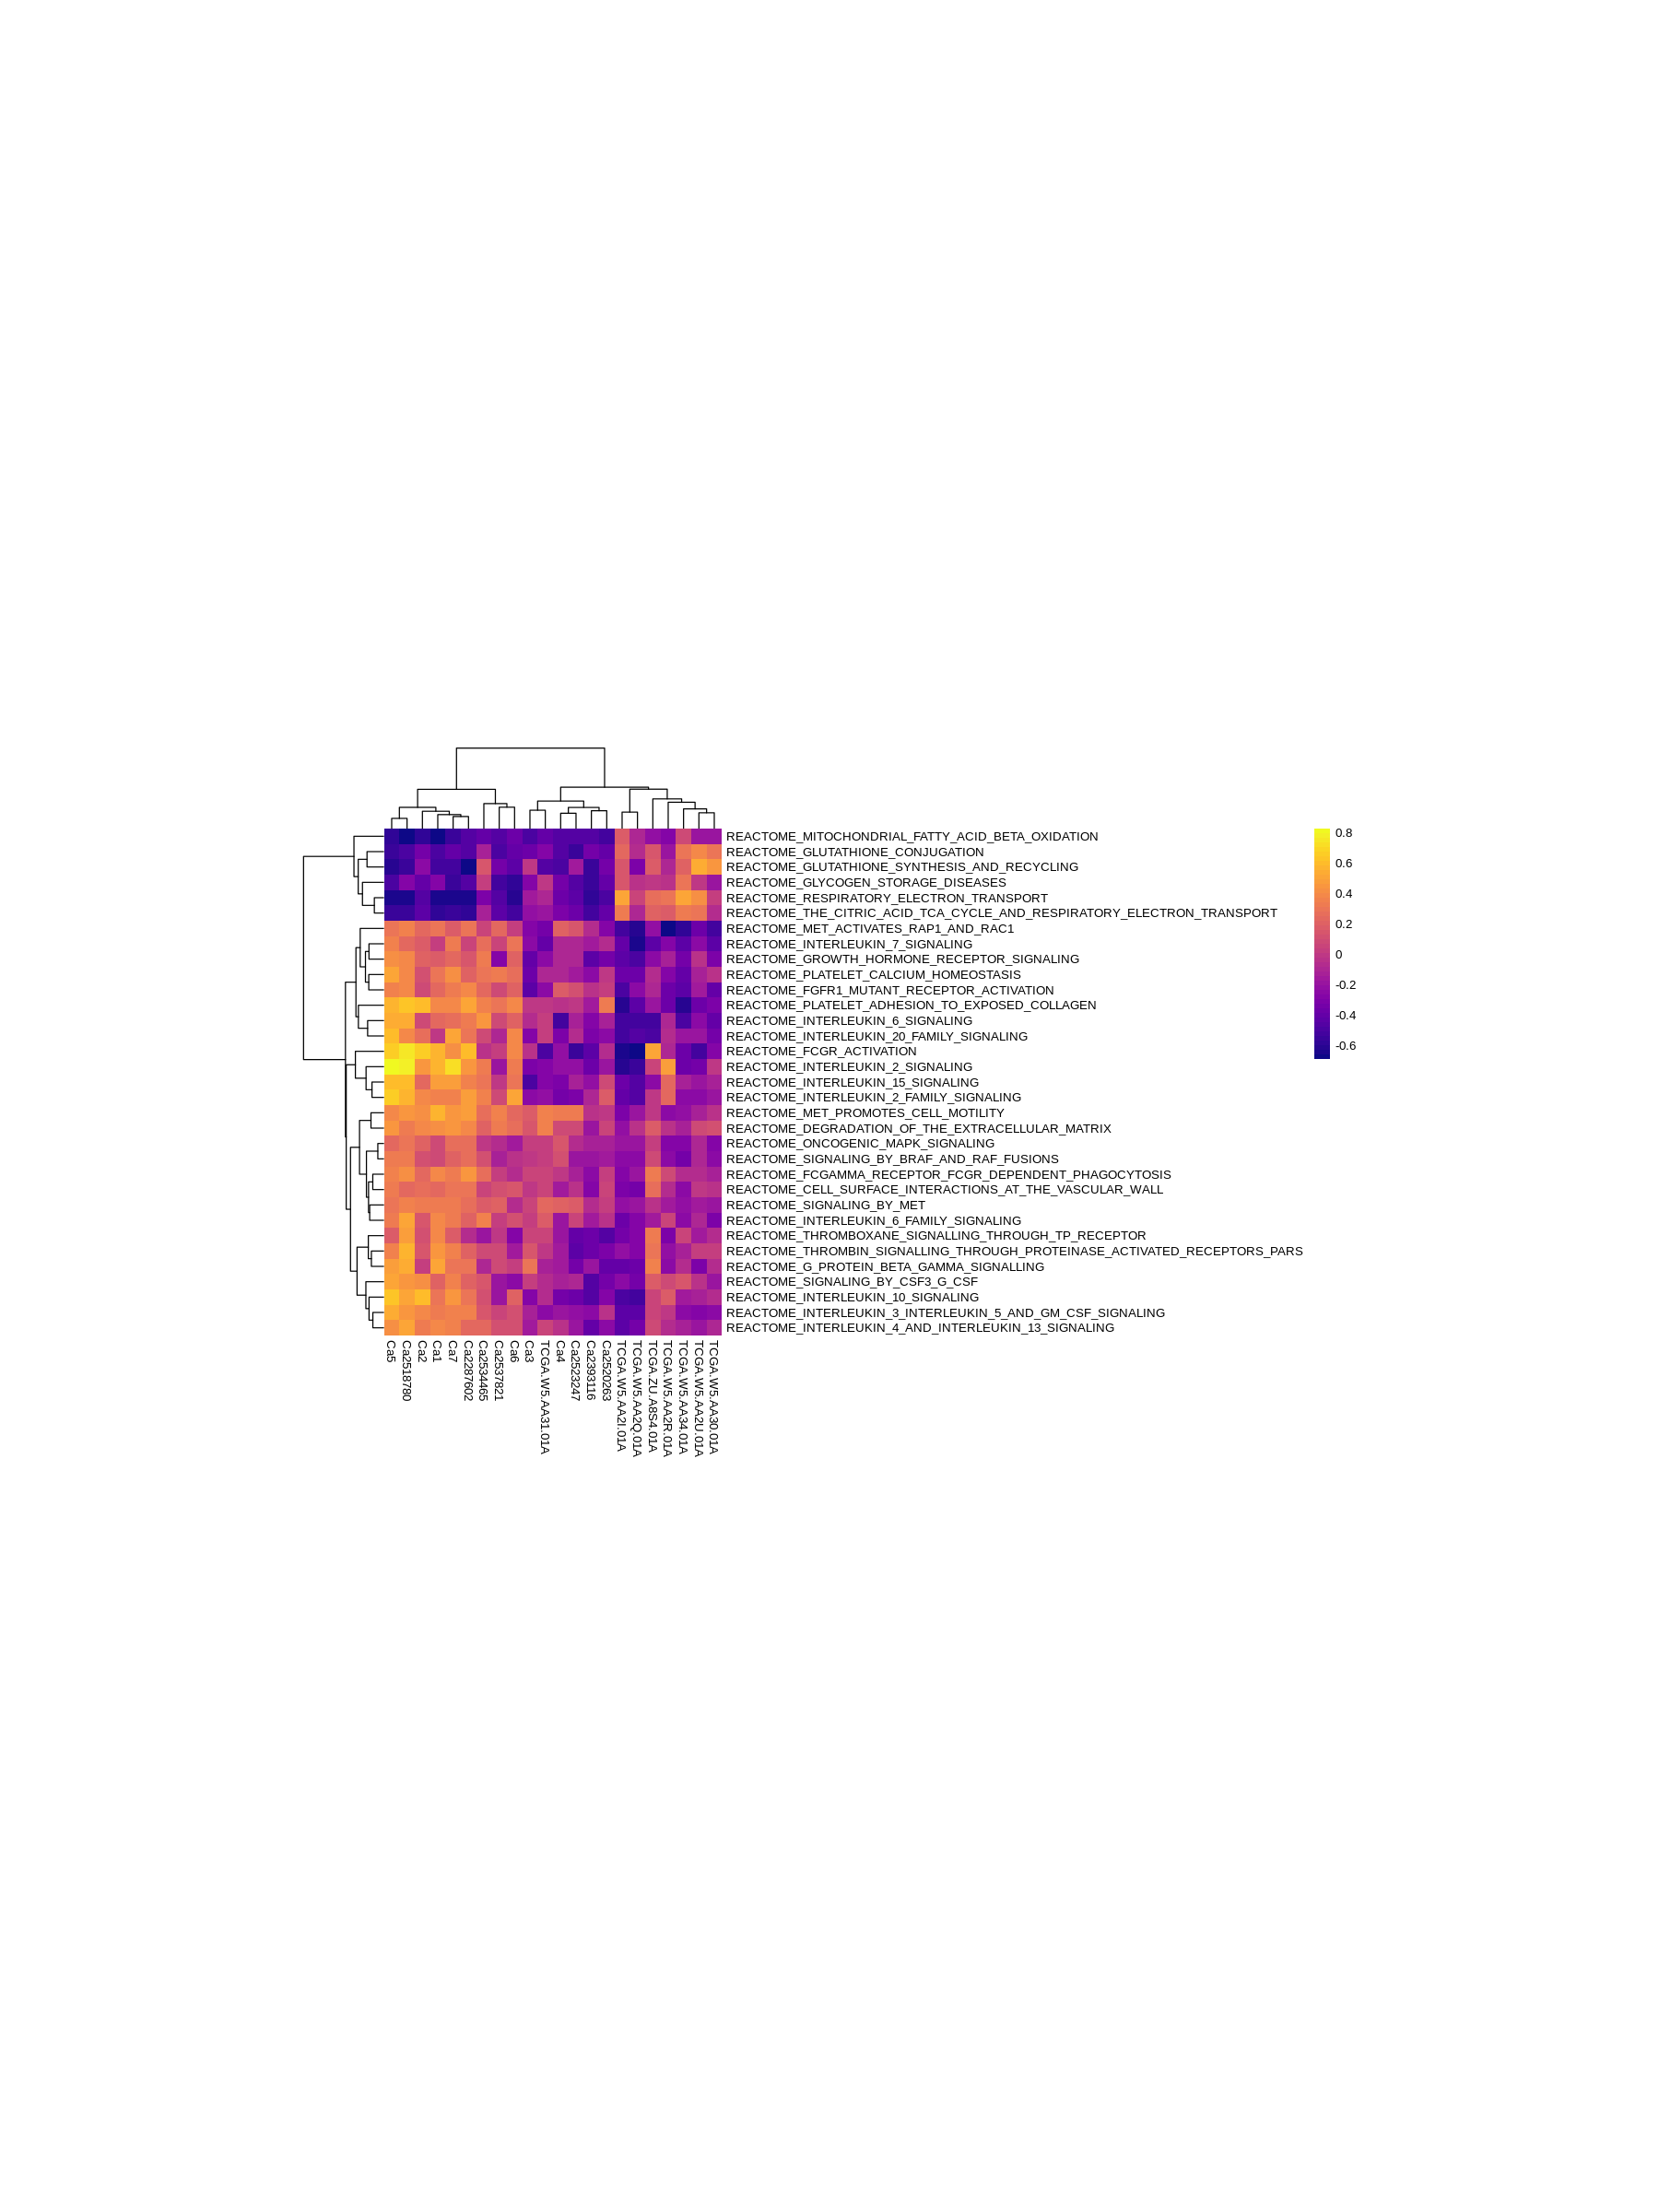

In [47]:
pheatmap(draw3,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8)

In [48]:
pheatmap(draw3,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8,file='0808-selectedGSVA.pdf')

In [54]:
names<-read.csv(file='0808-filterGSVA-34-3.csv')

In [55]:
names

colnames
<chr>
REACTOME_CELL_SURFACE_INTERACTIONS_AT_THE_VASCULAR_WALL
REACTOME_DEGRADATION_OF_THE_EXTRACELLULAR_MATRIX
REACTOME_FCGAMMA_RECEPTOR_FCGR_DEPENDENT_PHAGOCYTOSIS
REACTOME_FCGR_ACTIVATION
REACTOME_FGFR1_MUTANT_RECEPTOR_ACTIVATION
REACTOME_G_PROTEIN_BETA_GAMMA_SIGNALLING
REACTOME_GROWTH_HORMONE_RECEPTOR_SIGNALING
REACTOME_INTERLEUKIN_3_INTERLEUKIN_5_AND_GM_CSF_SIGNALING
REACTOME_MET_ACTIVATES_RAP1_AND_RAC1


In [56]:
draw3<-draw[names$colnames,]

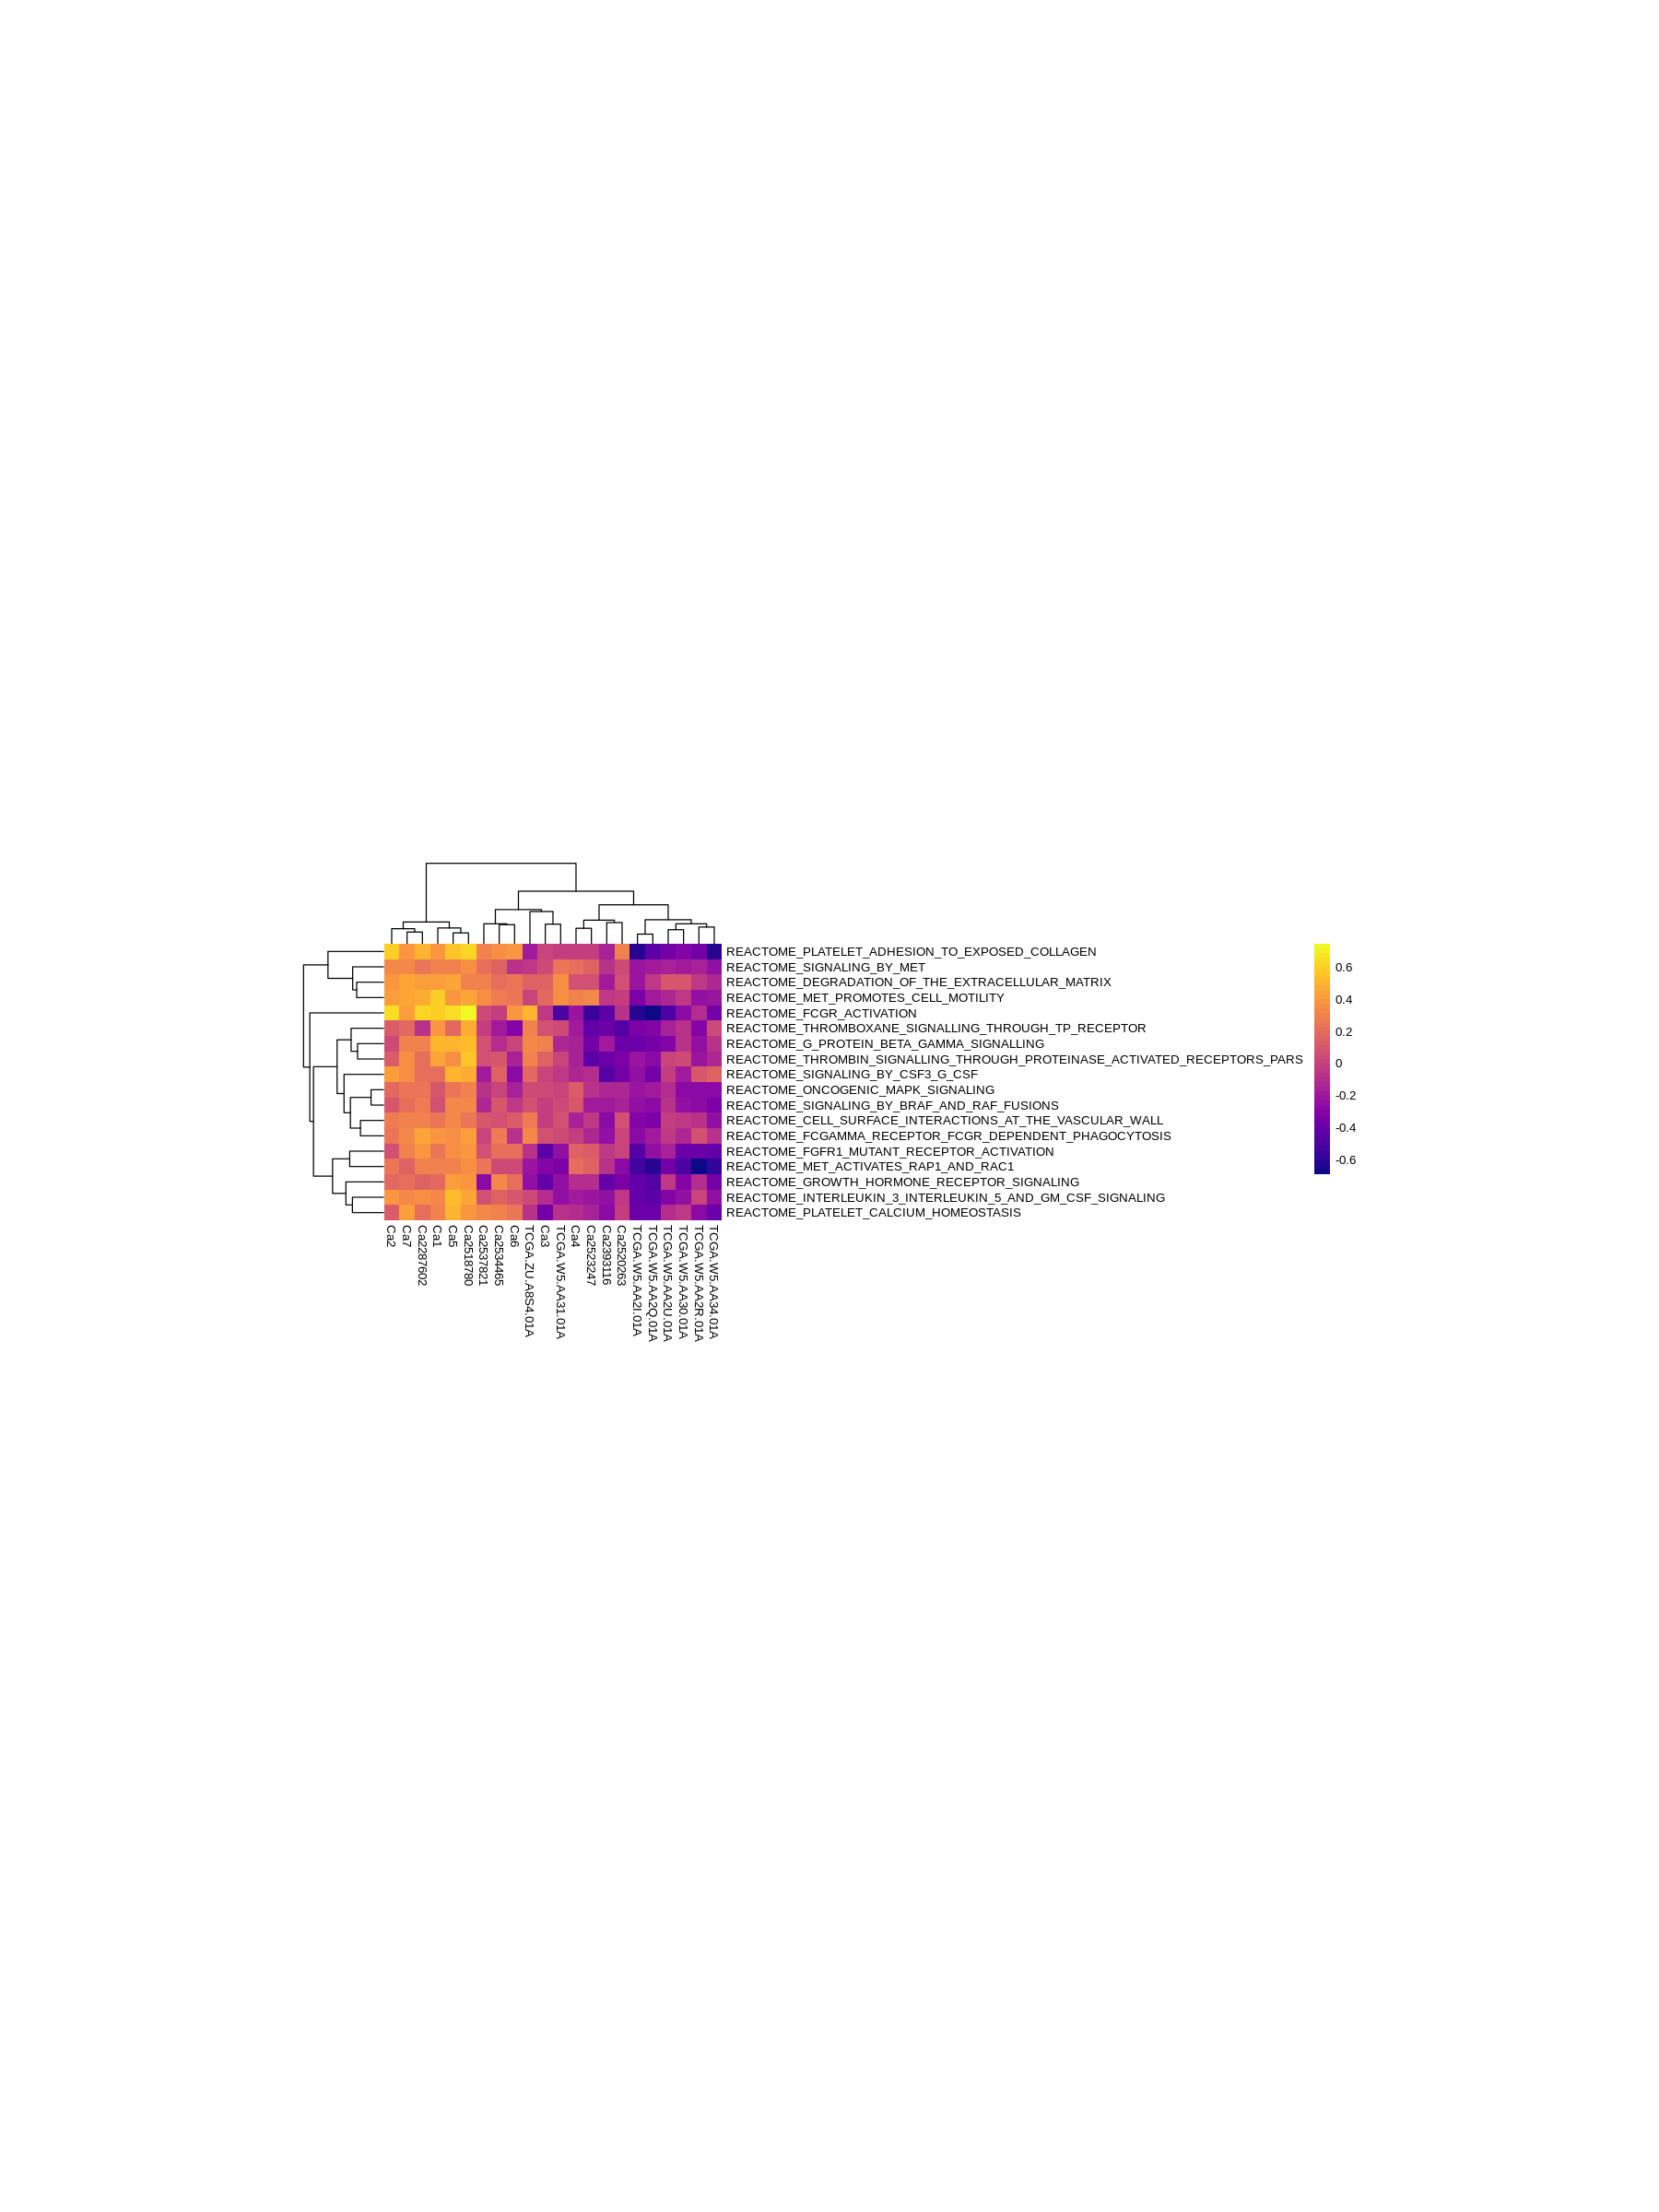

In [57]:
pheatmap(draw3,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8)

In [58]:
pheatmap(draw3,scale="none",border=FALSE,color=plasma(50),cellheight=10,cellwidth=10,fontsize=8,file='0719-selectedGSVA.pdf')